Importation des bibliothèques

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Importation dataset

In [11]:
df=pd.read_csv('accident.csv')
df=pd.DataFrame(df)
df.head(20)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
5,25,Male,49.0,Yes,Yes,1
6,38,Male,116.0,Yes,Yes,1
7,56,Male,47.0,Yes,Yes,1
8,36,Female,83.0,Yes,No,1
9,40,Female,116.0,Yes,No,1


EDA dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


Analyse Univariée variables Continues :
- Speed_of_Impact
- Age

In [13]:
df[["Age", "Speed_of_Impact"]].describe().round(2)

,Age,Speed_of_Impact
count,200.00,197.00
mean,43.42,70.44
std,14.94,30.13
min,18.00,20.00
25%,31.00,43.00
50%,43.50,71.00
75%,56.00,95.00
max,69.00,119.00


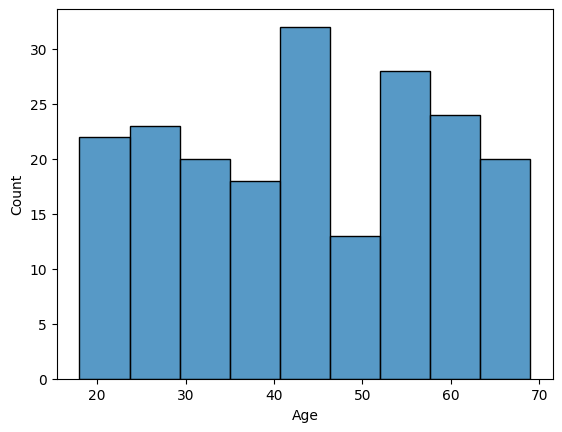

In [24]:
sns.histplot(df["Age"])
plt.show()

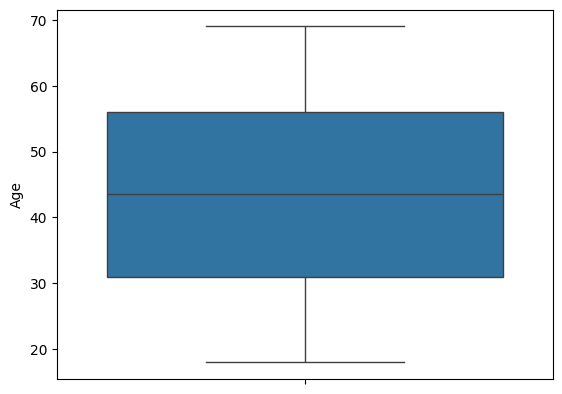

In [26]:
sns.boxplot(df["Age"])
plt.show()

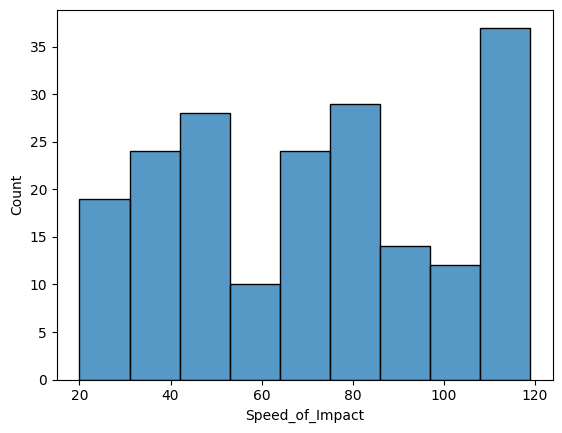

In [27]:
sns.histplot(df["Speed_of_Impact"])
plt.show()

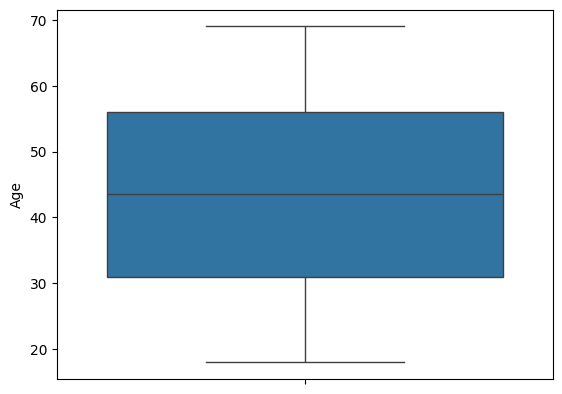

In [28]:
sns.boxplot(df["Age"])
plt.show()

Analyse Bivariée variables Continues :
- Speed_of_Impact
- Age

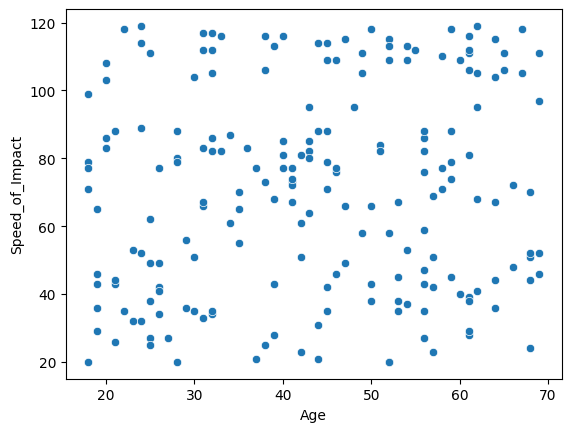

In [29]:
sns.scatterplot(x="Age", y="Speed_of_Impact", data=df)
plt.show()

Analyses Univariée variables discrètes:

In [41]:
print(df["Gender"].value_counts())
print(df["Gender"].value_counts()*100/199)

Gender
Female    110
Male       89
Name: count, dtype: int64
Gender
Female    55.276382
Male      44.723618
Name: count, dtype: float64


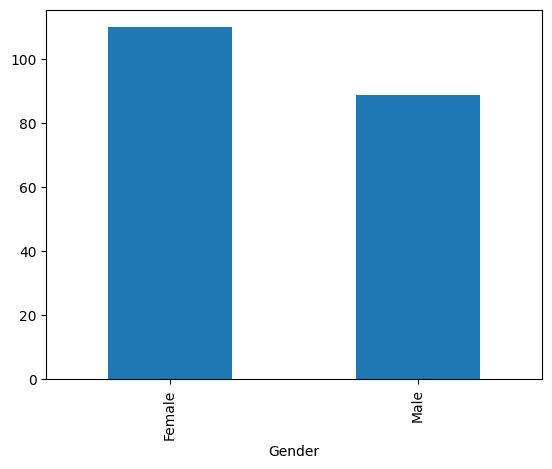

In [37]:
df["Gender"].value_counts().plot(kind="bar")
plt.show()

In [42]:
print(df["Helmet_Used"].value_counts())
print(df["Helmet_Used"].value_counts()*100/199)

Helmet_Used
Yes    111
No      89
Name: count, dtype: int64
Helmet_Used
Yes    55.778894
No     44.723618
Name: count, dtype: float64


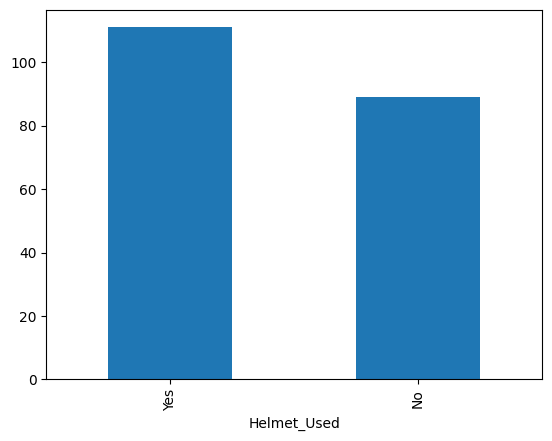

In [43]:
df["Helmet_Used"].value_counts().plot(kind="bar")
plt.show()

In [44]:
print(df["Seatbelt_Used"].value_counts())
print(df["Seatbelt_Used"].value_counts()*100/199)

Seatbelt_Used
Yes    111
No      89
Name: count, dtype: int64
Seatbelt_Used
Yes    55.778894
No     44.723618
Name: count, dtype: float64


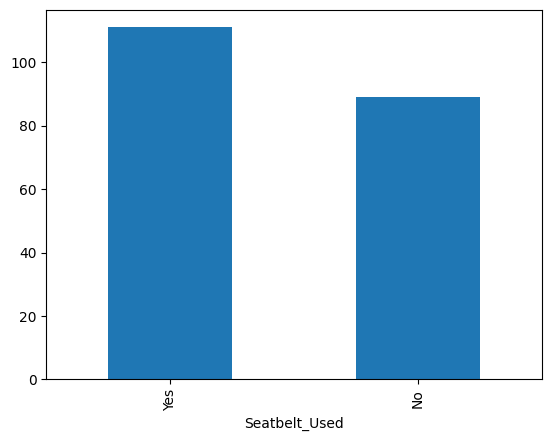

In [45]:
df["Seatbelt_Used"].value_counts().plot(kind="bar")
plt.show()

In [46]:
print(df["Survived"].value_counts())
print(df["Survived"].value_counts()*100/199)

Survived
1    101
0     99
Name: count, dtype: int64
Survived
1    50.753769
0    49.748744
Name: count, dtype: float64


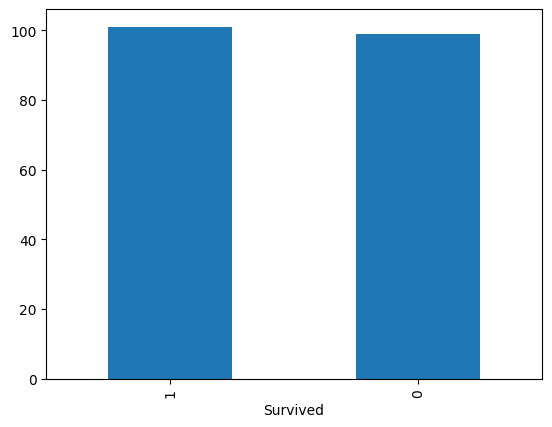

In [47]:
df["Survived"].value_counts().plot(kind="bar")
plt.show()